<a href="https://colab.research.google.com/github/saritmaitra/Forex_VAR-VECM/blob/main/VAR_7series__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<<<<<<< WORK COMPLETE FOR THIS SECTION >>>>>

In [ ]:
!pip install pyforest
from pyforest import *
import datetime, pickle, copy, warnings, math
from pandas import DataFrame, merge, concat
plt.style.use('dark_background')
from google.colab import files
!pip install arch
from arch.unitroot import ADF

# 1 Original series ingestion:

In [ ]:
uploaded = files.upload()
print('view data...')
original = pd.read_csv("AL_23_series.csv")
original.tail(2)

Saving AL_23_series.csv to AL_23_series.csv
view data...


<IPython.core.display.Javascript object>

,Unnamed: 0,timestamp,6e,6j,es,eurusd,gbpusd,gc,nq,usdjpy,audjpy,audnzd,audusd,euraud,eurchf,si,nzdusd,tnm0,ub,usdcad,ymm0,zbm0,zfm0,znm0,ztm0
30965,30965,2020-04-24 21:02:00,1.0954,0.009326,2874.375,1092175.0,1251515.0,1695.4,8839.75,107573000.0,68799500.0,1049275.0,639620.0,1699790.0,1055125.0,15.0175,609480.0,155.359375,224.578125,1389435.0,23863.0,178.453125,125.179688,139.0,110.162109
30966,30966,2020-04-24 21:03:00,1.0954,0.009326,2874.375,1092175.0,1251515.0,1695.4,8839.75,107573000.0,68799500.0,1049275.0,639620.0,1699790.0,1055125.0,15.0175,609480.0,155.359375,224.578125,1389435.0,23863.0,178.453125,125.179688,139.0,110.162109


## 1.1 Selected 7 series:

```
# ['es', 'eurusd', 'gbpusd', 'gc', 'usdjpy', 'zbm0', 'eurchf']
```

In [ ]:
original = original.set_index('timestamp')
original = original[['es', 'eurusd', 'gbpusd', 'gc', 'usdjpy', 'zbm0', 'eurchf']]
original = original.sort_index(ascending=True) # sorting ascending order
original

,es,eurusd,gbpusd,gc,usdjpy,zbm0,eurchf
timestamp,,,,,,,
2020-04-01 00:00:00,2540.375,1102770.0,1241055.0,1591.90,107463000.0,179.953125,1060370.0
2020-04-01 00:01:00,2538.125,1103015.0,1241150.0,1590.90,107419500.0,179.953125,1060435.0
2020-04-01 00:02:00,2538.375,1102830.0,1241100.0,1591.55,107437000.0,179.921875,1060055.0
2020-04-01 00:03:00,2537.750,1102735.0,1241100.0,1591.00,107382500.0,179.921875,1059870.0
2020-04-01 00:04:00,2535.250,1102780.0,1241860.0,1590.60,107356500.0,179.921875,1059870.0
...,...,...,...,...,...,...,...
2020-04-30 23:55:00,2870.625,1094390.0,1258030.0,1695.50,107279500.0,180.921875,1057785.0
2020-04-30 23:56:00,2872.125,1094390.0,1257990.0,1695.35,107304000.0,180.890625,1057920.0
2020-04-30 23:57:00,2872.500,1094465.0,1258085.0,1695.45,107295500.0,180.906250,1057905.0


In [ ]:
original.to_csv('series_7_1.csv')

In [ ]:
files.download('series_7_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1.1.2 Statistics:

In [ ]:
pd.options.display.float_format = "{:.2f}".format
original.describe().transpose()

<IPython.core.display.Javascript object>

,count,mean,std,min,25%,50%,75%,max
es,30967.00,2753.56,130.90,2427.88,2715.62,2784.12,2856.50,2964.62
eurusd,30967.00,1087090.10,5511.17,1072760.00,1083165.00,1086390.00,1091605.00,1103550.00
gbpusd,30967.00,1241615.92,8899.02,1218130.00,1234780.00,1242115.00,1247460.00,1304000.00
gc,30967.00,1706.19,43.62,1583.50,1689.30,1714.40,1737.70,1787.60
usdjpy,30967.00,107775591.92,716554.43,104634000.00,107332500.00,107683000.00,108284750.00,114280000.00
zbm0,30967.00,180.54,1.45,177.44,179.33,180.86,181.70,183.05
eurchf,30967.00,1054940.88,2736.76,1010650.00,1052465.00,1055395.00,1056470.00,1104700.00


**INFERENCE**

- standard deviation smaller than mean for all the features indicating that the data points for these features are clustered around mean.



In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

pd.options.display.float_format = "{:.2f}".format
"""
if the number > +1 or < –1, this is an indication of a substantially skewed distribution. 
if the number > +1, the distribution is too peaked. 
kurtosis of < –1 indicates a distribution that is too flat. 
Distributions exhibiting skewness and/or kurtosis that exceed these guidelines are considered nonnormal.
Ref: (Hair et al., 2017, p. 61).
"""
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(original)
lzip(name, test)

<IPython.core.display.Javascript object>

[('Jarque-Bera',
  array([4.19707323e+03, 7.38622180e+02, 1.67501168e+02, 5.12490182e+03,
         4.81505348e+04, 2.58937511e+03, 3.22670410e+06])),
 ('Chi^2 two-tail prob.',
  array([0.00000000e+000, 4.07597588e-161, 4.24212464e-037, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000])),
 ('Skew',
  array([-0.8986337 ,  0.33912516,  0.09392352, -0.97665052,  0.93660137,
         -0.52507939,  2.39737227])),
 ('Kurtosis',
  array([ 2.84953548,  2.6647055 ,  2.69254267,  3.39561236,  8.81452234,
          2.0492212 , 52.77716363]))]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

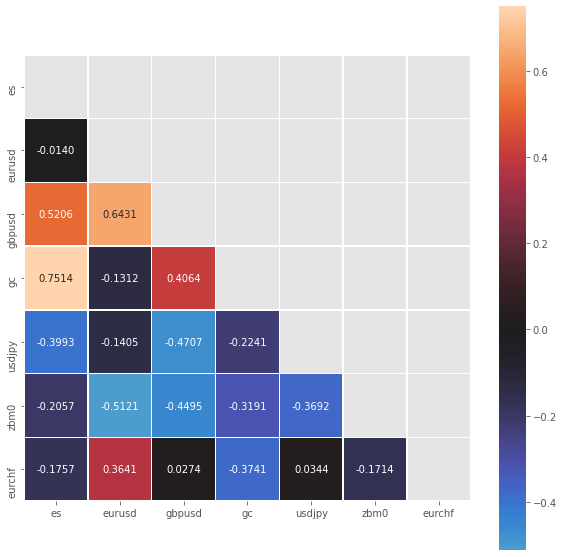

In [ ]:
plt.style.use('ggplot')
# Compute the correlation matrix
corr = original.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
# heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)
# value > 0.5 is considerred correlated, >0.8 is highly correlated
plt.show()

## 1.2 Original series visualization:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

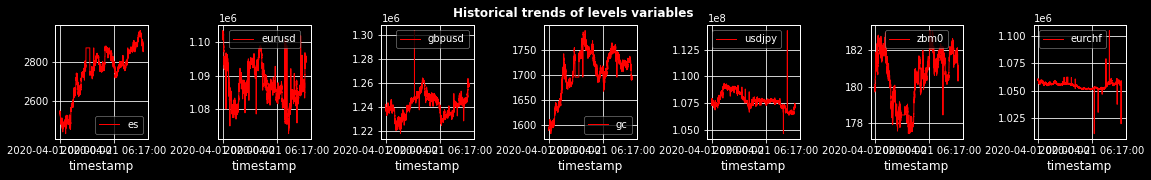

In [ ]:
plt.style.use('dark_background')
def plot_vars(train, levels, color, leveltype):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    fig, ax = plt.subplots(1, 7, figsize=(16,2.5), sharex=True)
    for col, i in dict(zip(levels, list(range(7)))).items():
        original[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    fig.suptitle(f"Historical trends of {leveltype} variables", 
                 fontsize=12, fontweight="bold")
    
plot_vars(original.values, levels = original.columns, color="red", leveltype="levels")
plt.tight_layout()

In [ ]:
from pandas.plotting import register_matplotlib_converters
from matplotlib.pylab import rcParams
register_matplotlib_converters()
rcParams['figure.figsize']=15,8

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

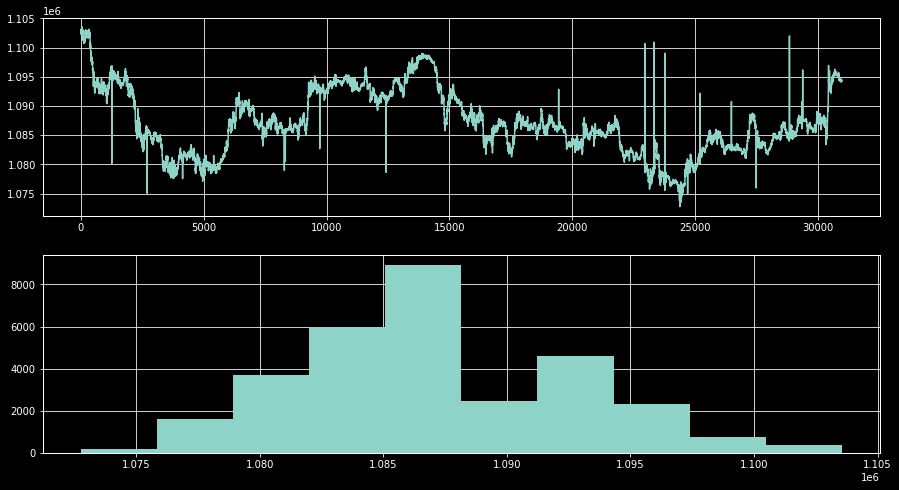

In [ ]:
# EURUSD
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(original.eurusd.values)
# histogram
plt.subplot(212)
plt.hist(original.eurusd.values)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

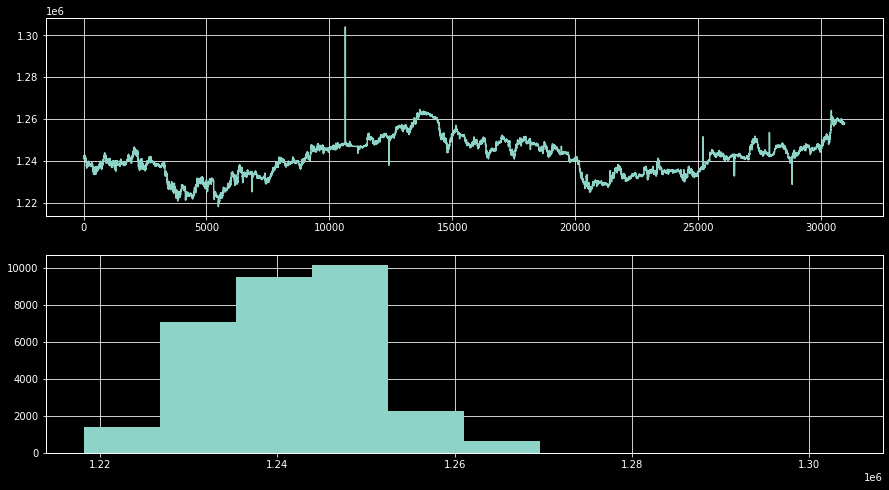

In [ ]:
# GBPUSD 
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(original.gbpusd.values, label = 'GBPUSD')
# histogram
plt.subplot(212)
plt.hist(original.gbpusd.values)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

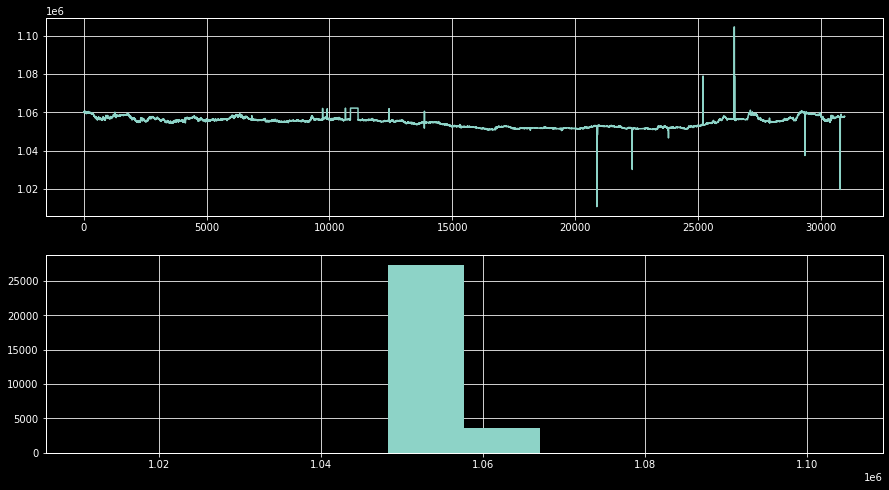

In [ ]:
# EURCHF
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(original.eurchf.values, label = 'EURCHF')
# histogram
plt.subplot(212)
plt.hist(original.eurchf.values)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

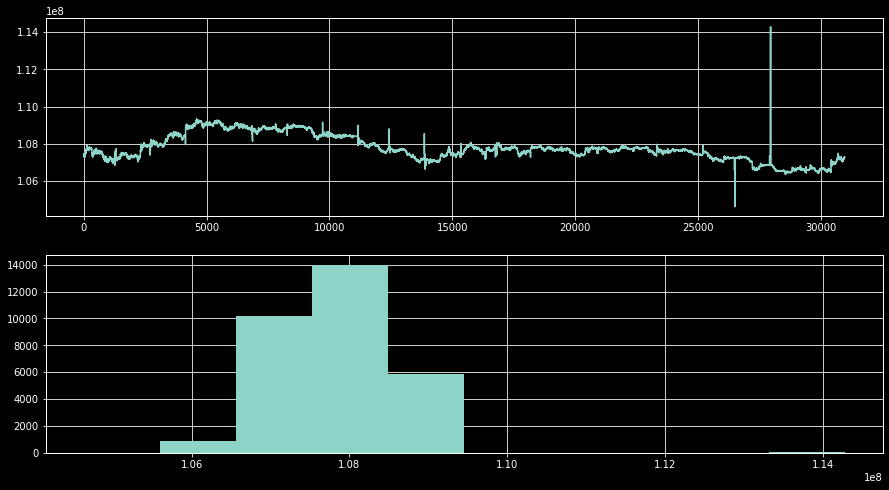

In [ ]:
# USDJPY 
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(original.usdjpy.values, label = 'USDJPY')
# histogram
plt.subplot(212)
plt.hist(original.usdjpy.values)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

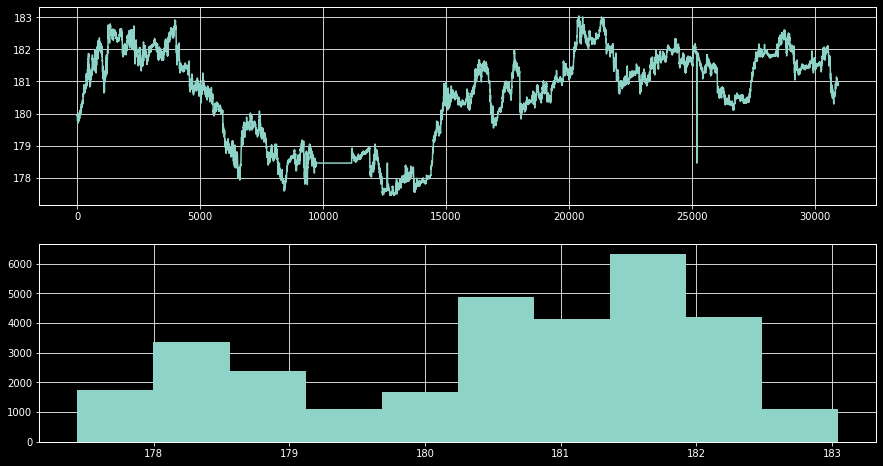

In [ ]:
# ZBM0
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(original.zbm0.values, label = 'ZBM0')
# histogram
plt.subplot(212)
plt.hist(original.zbm0.values)
plt.show()

In [ ]:
original.zbm0[10000:11000]

timestamp
2020-04-10 01:39:00   178.45
2020-04-10 01:40:00   178.45
2020-04-10 01:41:00   178.45
2020-04-10 01:42:00   178.45
2020-04-10 01:43:00   178.45
                       ...  
2020-04-10 18:14:00   178.45
2020-04-10 18:15:00   178.45
2020-04-10 18:16:00   178.45
2020-04-10 18:17:00   178.45
2020-04-10 18:18:00   178.45
Name: zbm0, Length: 1000, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

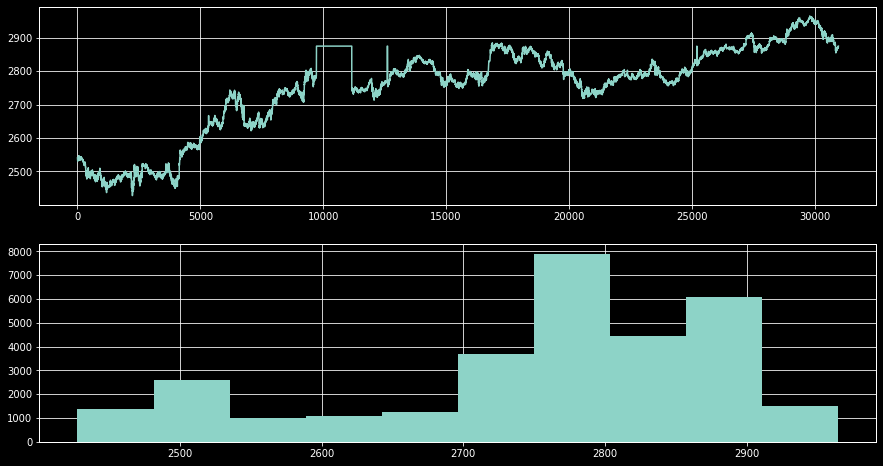

In [ ]:
# ES
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(original.es.values, label = 'ES')
# histogram
plt.subplot(212)
plt.hist(original.es.values)
plt.show()

In [ ]:
original.es[10000:11000]

timestamp
2020-04-10 01:39:00   2874.38
2020-04-10 01:40:00   2874.38
2020-04-10 01:41:00   2874.38
2020-04-10 01:42:00   2874.38
2020-04-10 01:43:00   2874.38
                        ...  
2020-04-10 18:14:00   2874.38
2020-04-10 18:15:00   2874.38
2020-04-10 18:16:00   2874.38
2020-04-10 18:17:00   2874.38
2020-04-10 18:18:00   2874.38
Name: es, Length: 1000, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

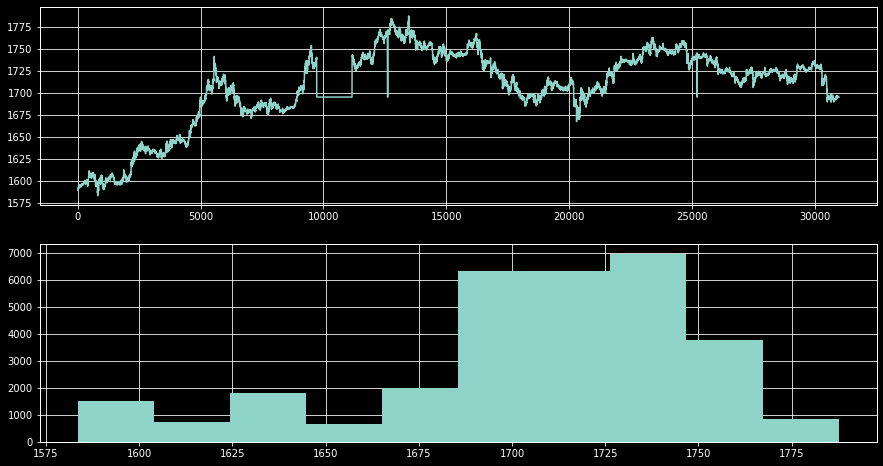

In [ ]:
# GC
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(original.gc.values, label = 'GC')
# histogram
plt.subplot(212)
plt.hist(original.gc.values)
plt.show()

In [ ]:
# reason for plot behaved abruptly 
original.gc[10000:11000]

timestamp
2020-04-10 01:39:00   1695.40
2020-04-10 01:40:00   1695.40
2020-04-10 01:41:00   1695.40
2020-04-10 01:42:00   1695.40
2020-04-10 01:43:00   1695.40
                        ...  
2020-04-10 18:14:00   1695.40
2020-04-10 18:15:00   1695.40
2020-04-10 18:16:00   1695.40
2020-04-10 18:17:00   1695.40
2020-04-10 18:18:00   1695.40
Name: gc, Length: 1000, dtype: float64

## 1.3 ACF, PACF:
1st for the stationary test done by visual inspection of computing the ACF, and PACF. ACFs and PACFs against the lag length as the arithmetical progression 1 to 40.
The solid vertical line in this diagram represents the zero axis and observations between spikes above or below the line are positive and negative values, respectively. 

For stationary time series, the correlogram tapers off quickly, whereas it dies off gradually for non-stationary time series. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

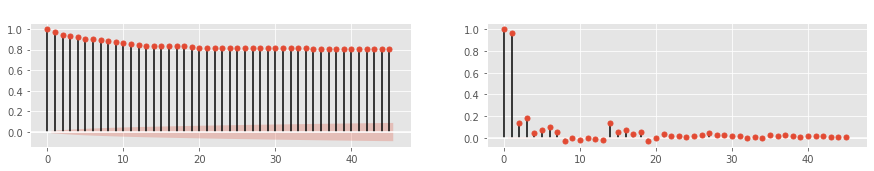

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 15,5
plt.style.use('ggplot')
plt.figure()
plt.subplot(221)
plot_acf(np.log(original.eurchf), ax=plt.gca())
plt.subplot(222)
plot_pacf(np.log(original.eurchf), ax=plt.gca())
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

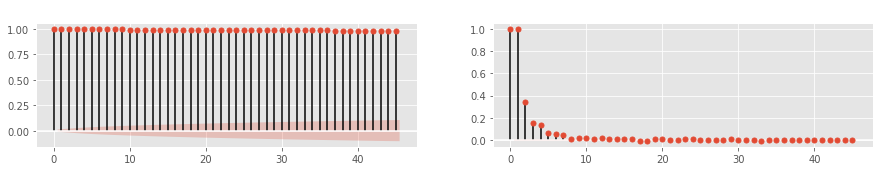

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 15,5
plt.style.use('ggplot')
plt.figure()
plt.subplot(221)
plot_acf(np.log(original.gbpusd), ax=plt.gca())
plt.subplot(222)
plot_pacf(np.log(original.gbpusd), ax=plt.gca())
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

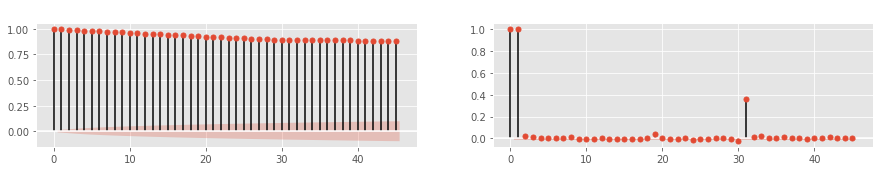

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 15,5
plt.style.use('ggplot')
plt.figure()
plt.subplot(221)
plot_acf(np.log(original.usdjpy), ax=plt.gca())
plt.subplot(222)
plot_pacf(np.log(original.usdjpy), ax=plt.gca())
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

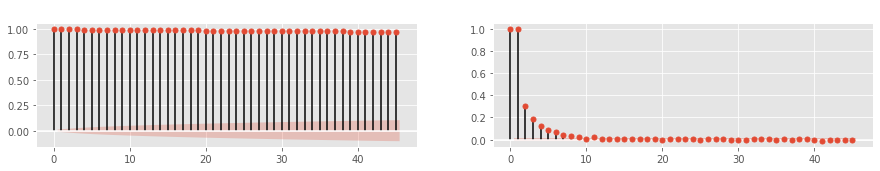

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 15,5
plt.style.use('ggplot')
plt.figure()
plt.subplot(221)
plot_acf(np.log(original.eurusd), ax=plt.gca())
plt.subplot(222)
plot_pacf(np.log(original.eurusd), ax=plt.gca())
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

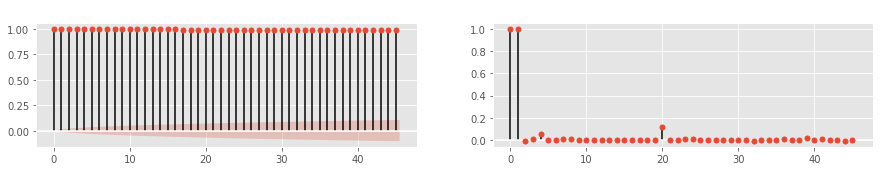

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 15,5
plt.style.use('ggplot')
plt.figure()
plt.subplot(221)
plot_acf(np.log(original.gc), ax=plt.gca())
plt.subplot(222)
plot_pacf(np.log(original.gc), ax=plt.gca())
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

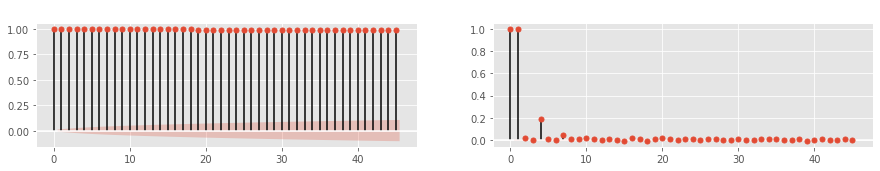

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 15,5
plt.style.use('ggplot')
plt.figure()
plt.subplot(221)
plot_acf(np.log(original.zbm0), ax=plt.gca())
plt.subplot(222)
plot_pacf(np.log(original.zbm0), ax=plt.gca())
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

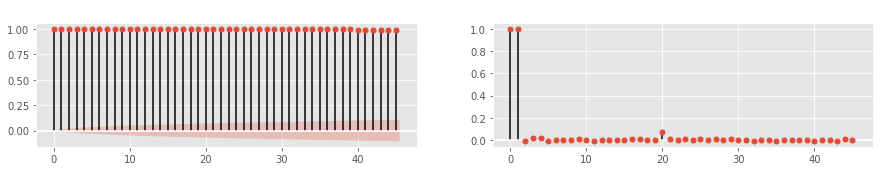

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 15,5
plt.style.use('ggplot')
plt.figure()
plt.subplot(221)
plot_acf(np.log(original.es), ax=plt.gca())
plt.subplot(222)
plot_pacf(np.log(original.es), ax=plt.gca())
plt.show()

## 1.4 Stationarity test:

### 1.4.1 Dicky-Fuller test:
ADF is a regression of the first difference of the variable on its lagged level as well as additional lags of the first difference. 

- Null Hypothesis (H0): If failed to be rejected (p-value > 0.05), then the time series has a unit root, meaning non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): If null hypothesis is rejected (p-value <= 0.05); it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

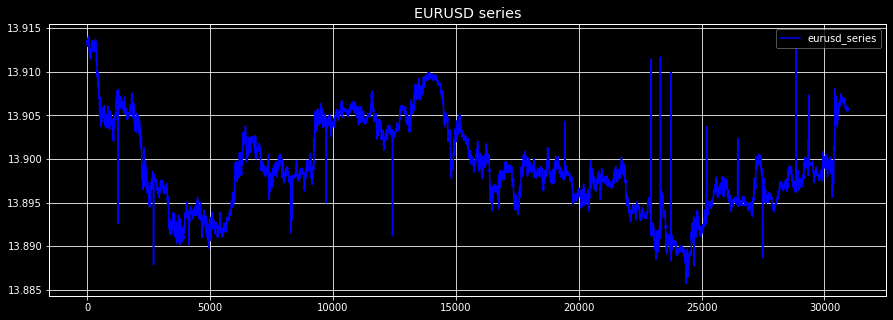


Results of Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                   -3.20
p-value                           0.02
#Lags Used                       13.00
Number of Observations Used   30953.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64

mean = 13.899002
variance = 0.000026


In [ ]:
plt.style.use('dark_background')
from statsmodels.tsa.stattools import adfuller

data = np.log(original['eurusd']).values
def test_for_stationary(input_data):
       
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'eurusd_series')
    
    plt.legend(loc = 'best')
    plt.title('EURUSD series')
    plt.show(block=False); print()
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput); print()
      
test_for_stationary(data)

mean = data.mean(); var = data.var()
print('mean = %f' % (mean)); print('variance = %f' % (var))

**Test statistic is -3,27; the more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary series).** 

We can see from look up table that our statistic is less than the value of -3.43 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fuke).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

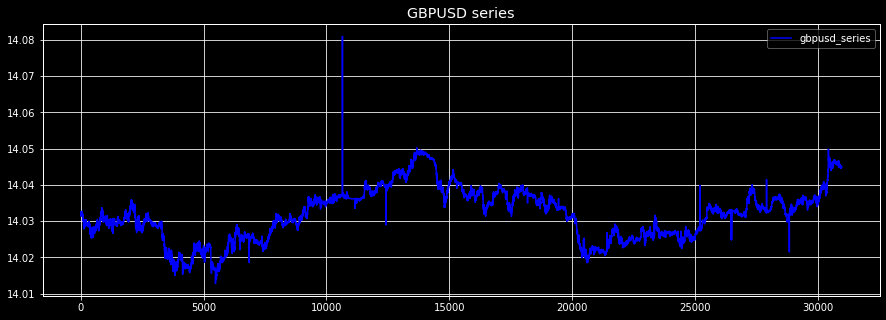


Results of Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                   -1.90
p-value                           0.33
#Lags Used                       16.00
Number of Observations Used   30950.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64

mean = 14.031899
variance = 0.000051


In [ ]:
from statsmodels.tsa.stattools import adfuller

data = np.log(original['gbpusd']).values
def test_for_stationary(input_data):
       
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'gbpusd_series')
    
    plt.legend(loc = 'best')
    plt.title('GBPUSD series')
    plt.show(block=False); print()
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput); print()
      
test_for_stationary(data)

mean = data.mean(); var = data.var()
print('mean = %f' % (mean)); print('variance = %f' % (var))

Test statistic is -2,25 > critical value (-3.43) at 1%; we cannot reject the null hypothesis (we have a non-stationary series).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

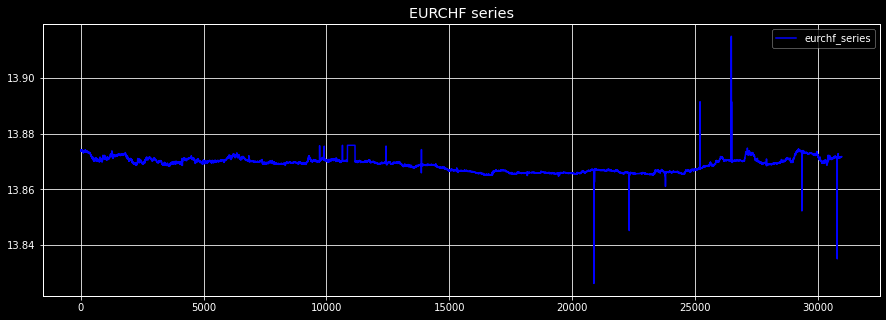


Results of Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                   -5.11
p-value                           0.00
#Lags Used                       51.00
Number of Observations Used   30915.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64

mean = 13.868992
variance = 0.000007


In [ ]:
from statsmodels.tsa.stattools import adfuller

data = np.log(original['eurchf']).values
def test_for_stationary(input_data):
       
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'eurchf_series')
    
    plt.legend(loc = 'best')
    plt.title('EURCHF series')
    plt.show(block=False); print()
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput); print()

test_for_stationary(data)

mean = data.mean(); var = data.var()
print('mean = %f' % (mean)); print('variance = %f' % (var))

**Test statistic is -5,17 < critical value (-3.43) at 1%; we can reject the null hypothesis (we have a stationary series).**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

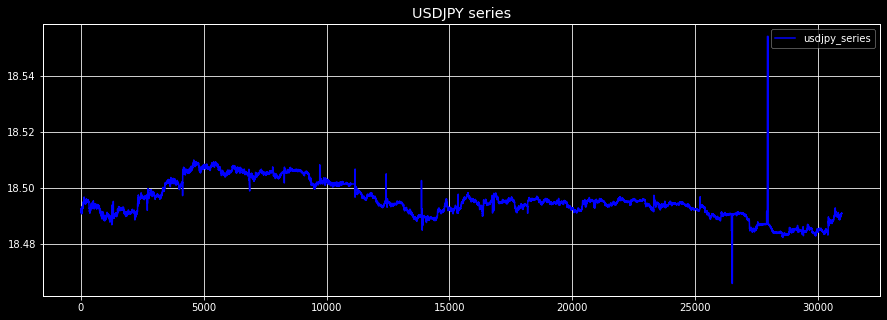


Results of Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                   -4.65
p-value                           0.00
#Lags Used                       48.00
Number of Observations Used   30918.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller

data = np.log(original['usdjpy']).values
def test_for_stationary(input_data):
       
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'usdjpy_series')
    
    plt.legend(loc = 'best')
    plt.title('USDJPY series')
    plt.show(block=False); print()
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(data)

**Test statistic is -4,86 < critical value (-3.43) at 1%; we can reject the null hypothesis (we have a stationary series).**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

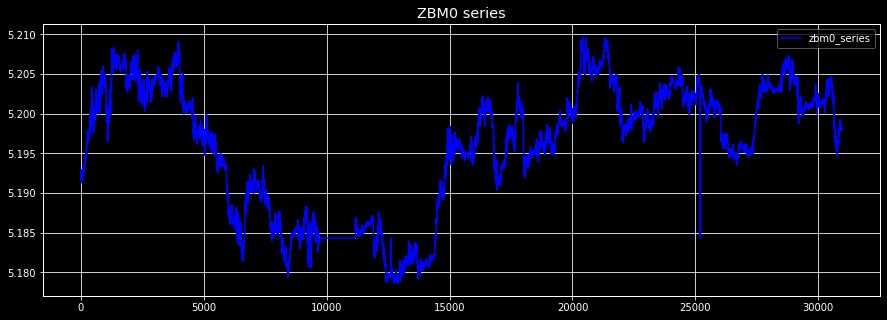


Results of Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                   -2.10
p-value                           0.25
#Lags Used                       19.00
Number of Observations Used   30947.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller

data = np.log(original['zbm0']).values
def test_for_stationary(input_data):
       
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'zbm0_series')
    
    plt.legend(loc = 'best')
    plt.title('ZBM0 series')
    plt.show(block=False); print()
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

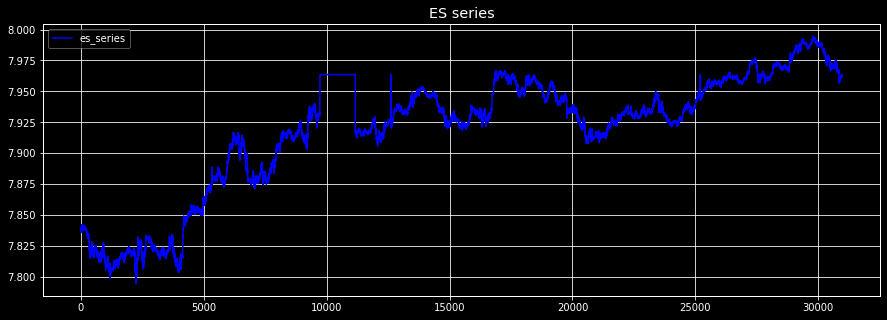


Results of Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                   -1.61
p-value                           0.48
#Lags Used                       19.00
Number of Observations Used   30947.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller

data = np.log(original['es']).values
def test_for_stationary(input_data):
       
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'es_series')
    
    plt.legend(loc = 'best')
    plt.title('ES series')
    plt.show(block=False); print()
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

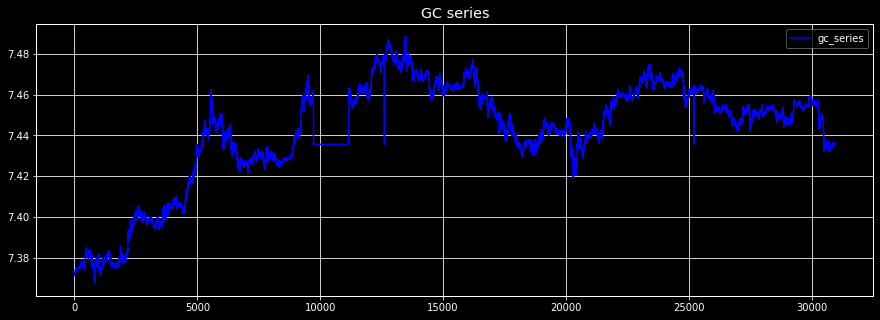


Results of Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                   -2.72
p-value                           0.07
#Lags Used                       23.00
Number of Observations Used   30943.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller

data = np.log(original['gc']).values
def test_for_stationary(input_data):
       
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'gc_series')
    
    plt.legend(loc = 'best')
    plt.title('GC series')
    plt.show(block=False); print()
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(data)

**ADF shows that [EURUSD, USDJPY, EURCHF] series are stationary** 

In [ ]:
ES = ADF(np.log(original.es))
#print("ES Unit root test:")
#print(ES.summary().as_text())
#print('>>>>>>>>>>>>>>>>>>>>>')

EURUSD = ADF(np.log(original.eurusd))
#print("EURUSD Unit root test:")
#print(EURUSD.summary().as_text())
#print('>>>>>>>>>>>>>>>>>>>>>')

GBPUSD = ADF(np.log(original.gbpusd))
#print("GBPUSD Unit root test:")
#print(GBPUSD.summary().as_text())
#print('>>>>>>>>>>>>>>>>>>>>>')

ZBM0 = ADF(np.log(original.zbm0))
#print("ZBM0 Unit root test:")
#print(ZBM0.summary().as_text())
#print('>>>>>>>>>>>>>>>>>>>>>')

EURCHF = ADF(np.log(original.eurchf))
#print("EURCHF Unit root test:")
#print(EURCHF.summary().as_text())
#print('>>>>>>>>>>>>>>>>>>>>>')

USDJPY = ADF(np.log(original.usdjpy))
#print("USDJPY Unit root test:")
#print(USDJPY.summary().as_text())
#print('>>>>>>>>>>>>>>>>>>>>>')

GC = ADF(np.log(original.gc))
#print("GC Unit root test:")
#print(GC.summary().as_text())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


ADF assumes residuals are white noise, and that the number of lags is sufficient to pick up any dependence in the data.

#### 1.4.1.1 Regression (ES)

In [ ]:
# ADF uses a standard regression when computing results
reg1 = ES.regression
print(reg1.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     15.81
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           8.02e-55
Time:                        13:22:10   Log-Likelihood:             1.7814e+05
No. Observations:               30947   AIC:                        -3.562e+05
Df Residuals:                   30926   BIC:                        -3.561e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0001   8.95e-05     -1.611      0.1

In [ ]:
original.es

timestamp
2020-04-01 00:00:00   2540.38
2020-04-01 00:01:00   2538.12
2020-04-01 00:02:00   2538.38
2020-04-01 00:03:00   2537.75
2020-04-01 00:04:00   2535.25
                        ...  
2020-04-30 23:55:00   2870.62
2020-04-30 23:56:00   2872.12
2020-04-30 23:57:00   2872.50
2020-04-30 23:58:00   2874.38
2020-04-30 23:59:00   2874.38
Name: es, Length: 30967, dtype: float64

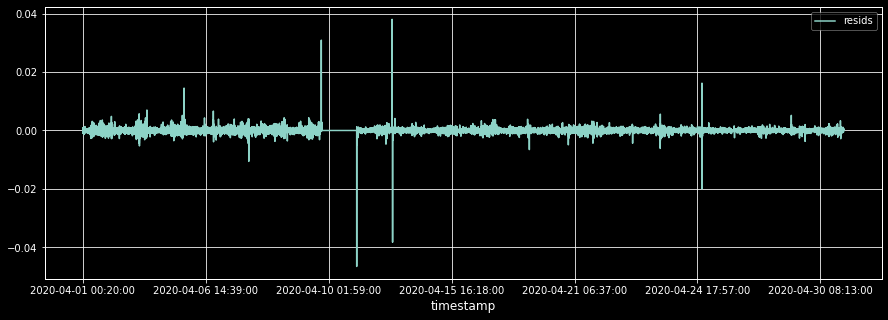

In [ ]:
resid_es = DataFrame(reg1.resid)
resid_es.index = original.index[20:]
resid_es.columns = ['resids']
fig = resid_es.plot()

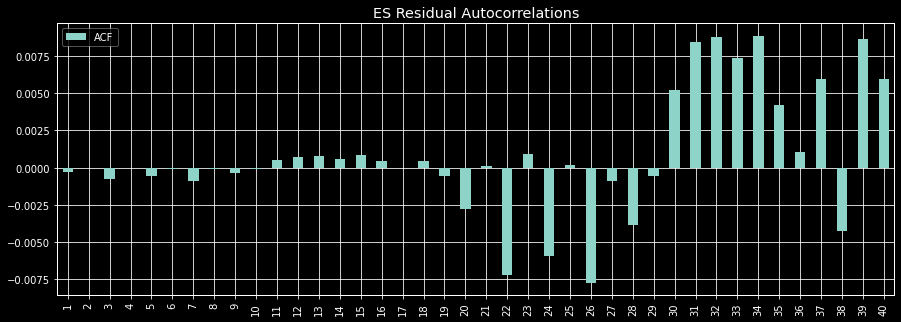

In [ ]:
import statsmodels.api as sm
"""
Since the number lags was directly set, will check whether the residuals appear to be white noise.
"""
acf = DataFrame(sm.tsa.stattools.acf(reg1.resid, fft=True), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='ES Residual Autocorrelations')

#### 1.4.1.2 Regression(EURUSD):

In [ ]:
reg2 = EURUSD.regression
print(reg2.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     453.8
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:22:11   Log-Likelihood:             1.9941e+05
No. Observations:               30953   AIC:                        -3.988e+05
Df Residuals:                   30938   BIC:                        -3.987e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0014      0.000     -3.202      0.0

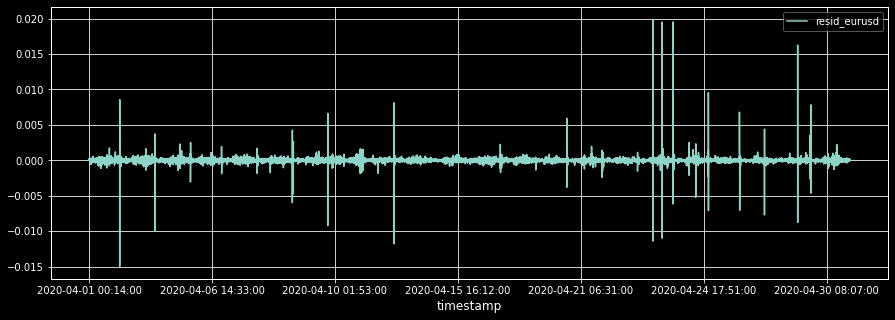

In [ ]:
resid_eurusd = DataFrame(reg2.resid)
resid_eurusd.index = original.index[14:]
resid_eurusd.columns = ['resid_eurusd']
fig = resid_eurusd.plot()

<IPython.core.display.Javascript object>

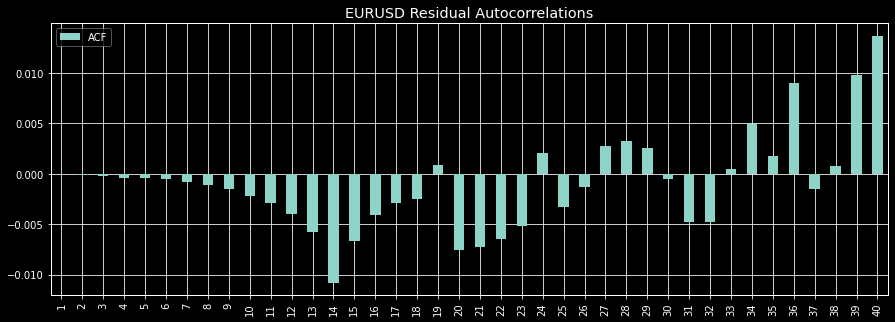

In [ ]:
acf = pd.DataFrame(sm.tsa.stattools.acf(reg2.resid, fft=True), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='EURUSD Residual Autocorrelations')

#### 1.4.1.3 Regression (GBPUSD)

In [ ]:
reg3 = GBPUSD.regression
print(reg3.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     366.8
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:22:12   Log-Likelihood:             1.9609e+05
No. Observations:               30950   AIC:                        -3.921e+05
Df Residuals:                   30932   BIC:                        -3.920e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0006      0.000     -1.898      0.0

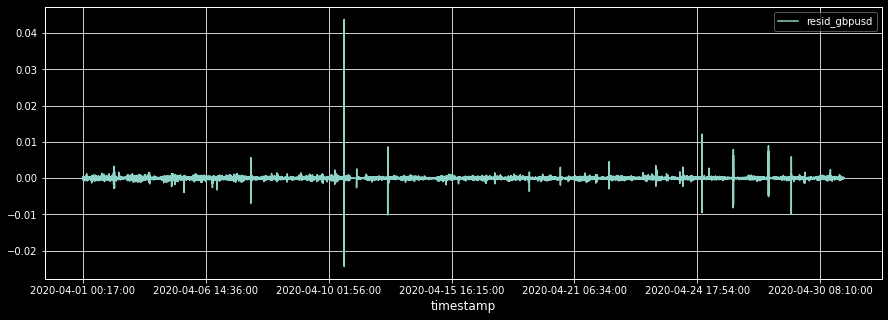

In [ ]:
resid_gbpusd = DataFrame(reg3.resid)
resid_gbpusd.index = original.index[17:]
resid_gbpusd.columns = ['resid_gbpusd']
fig = resid_gbpusd.plot()

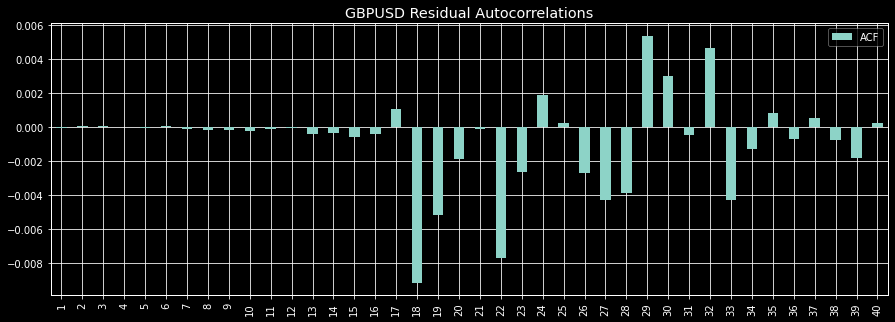

In [ ]:
import statsmodels.api as sm

"""
Since the number lags was directly set, will check whether the residuals appear to be white noise.
"""
acf = DataFrame(sm.tsa.stattools.acf(reg3.resid, fft=True), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='GBPUSD Residual Autocorrelations')

#### 1.4.1.4 Regression (GC)

In [ ]:
reg4 = GC.regression
print(reg4.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     35.87
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          7.67e-164
Time:                        13:22:13   Log-Likelihood:             1.8442e+05
No. Observations:               30943   AIC:                        -3.688e+05
Df Residuals:                   30918   BIC:                        -3.686e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0004      0.000     -2.717      0.0

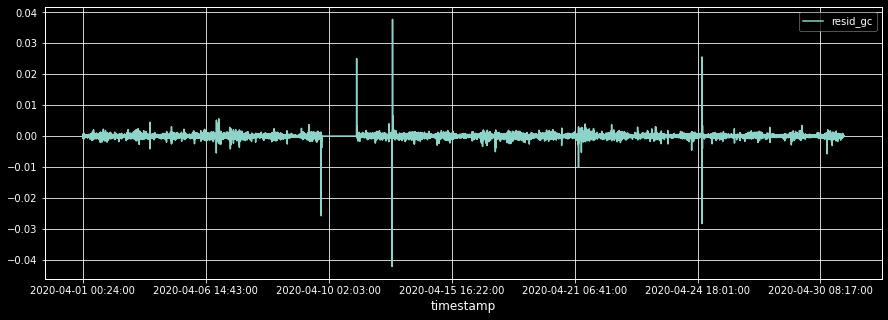

In [ ]:
resid_gc = DataFrame(reg4.resid)
resid_gc.index = original.index[24:]
resid_gc.columns = ['resid_gc']
fig = resid_gc.plot()

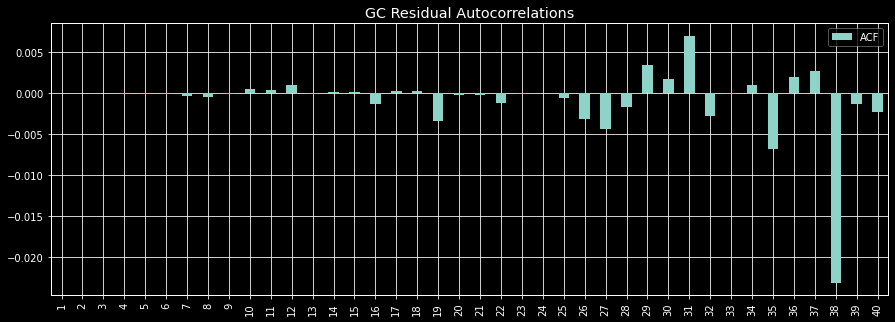

In [ ]:
import statsmodels.api as sm

"""
Since the number lags was directly set, will check whether the residuals appear to be white noise.
"""
acf = DataFrame(sm.tsa.stattools.acf(reg4.resid, fft=True), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='GC Residual Autocorrelations')

#### 1.4.1.5 Regression (EURCHF)

In [ ]:
reg5 = EURCHF.regression
print(reg5.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     91.29
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:22:14   Log-Likelihood:             1.8403e+05
No. Observations:               30915   AIC:                        -3.680e+05
Df Residuals:                   30862   BIC:                        -3.675e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0077      0.002     -5.105      0.0

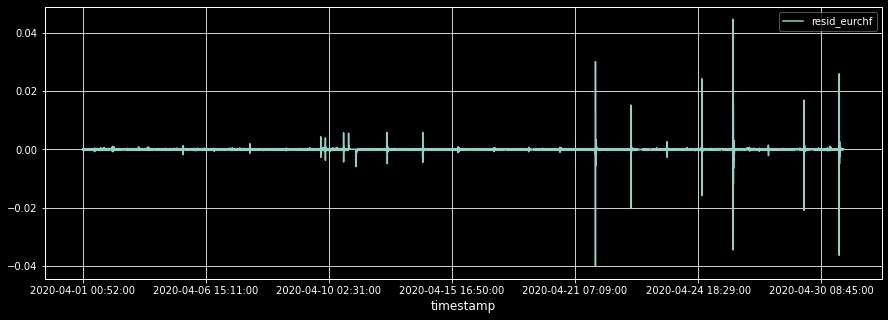

In [ ]:
resid_eurchf = DataFrame(reg5.resid)
resid_eurchf.index = original.index[52:]
resid_eurchf.columns = ['resid_eurchf']
fig = resid_eurchf.plot()

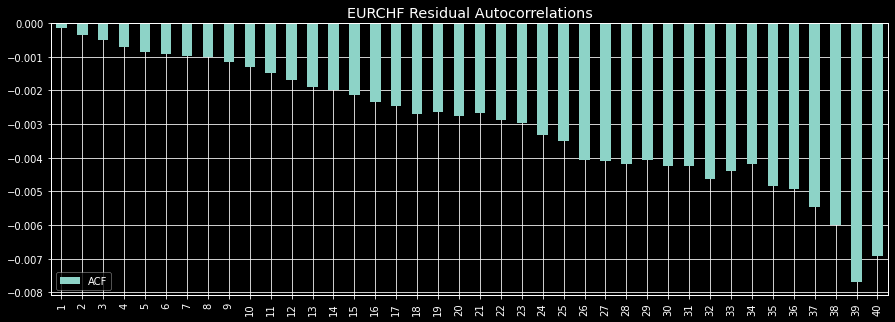

In [ ]:
import statsmodels.api as sm

"""
Since the number lags was directly set, will check whether the residuals appear to be white noise.
"""
acf = DataFrame(sm.tsa.stattools.acf(reg5.resid, fft=True), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='EURCHF Residual Autocorrelations')

#### 1.4.1.6 Regression (USDJPY):

In [ ]:
reg6 = USDJPY.regression
print(reg6.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     100.1
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:22:15   Log-Likelihood:             1.8720e+05
No. Observations:               30918   AIC:                        -3.743e+05
Df Residuals:                   30868   BIC:                        -3.739e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0023      0.001     -4.646      0.0

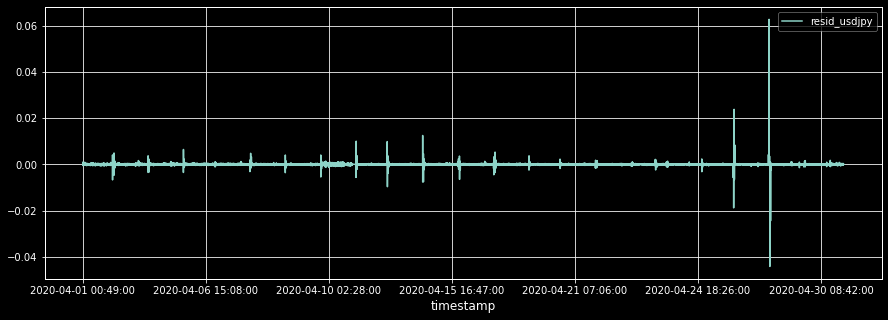

In [ ]:
resid_usdjpy = DataFrame(reg6.resid)
resid_usdjpy.index = original.index[49:]
resid_usdjpy.columns = ['resid_usdjpy']
fig = resid_usdjpy.plot()

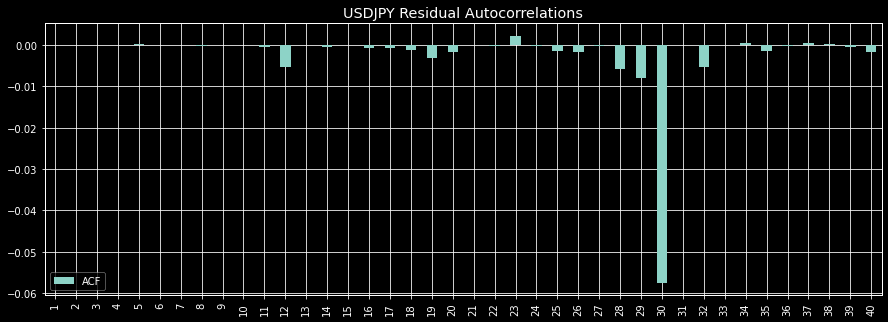

In [ ]:
import statsmodels.api as sm

"""
Since the number lags was directly set, will check whether the residuals appear to be white noise.
"""
acf = DataFrame(sm.tsa.stattools.acf(reg6.resid, fft=True), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='USDJPY Residual Autocorrelations')

#### 1.4.1.7 Regression (ZBM0):

In [ ]:
reg7 = ZBM0.regression
print(reg7.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     56.90
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          2.64e-224
Time:                        13:22:16   Log-Likelihood:             2.1226e+05
No. Observations:               30947   AIC:                        -4.245e+05
Df Residuals:                   30926   BIC:                        -4.243e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0004      0.000     -2.095      0.0

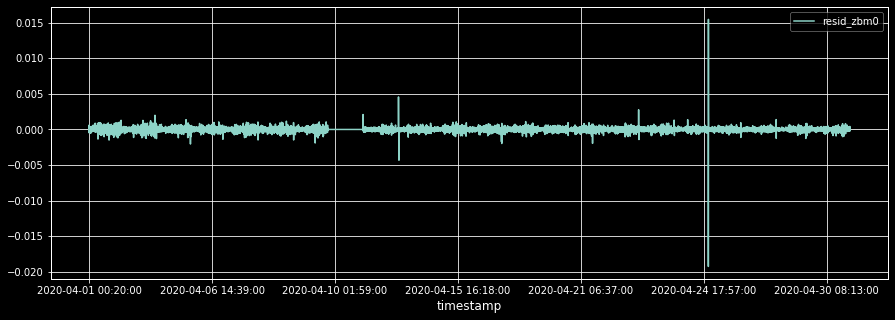

In [ ]:
resid_zbm0 = DataFrame(reg7.resid)
resid_zbm0.index = original.index[20:]
resid_zbm0.columns = ['resid_zbm0']
fig = resid_zbm0.plot()

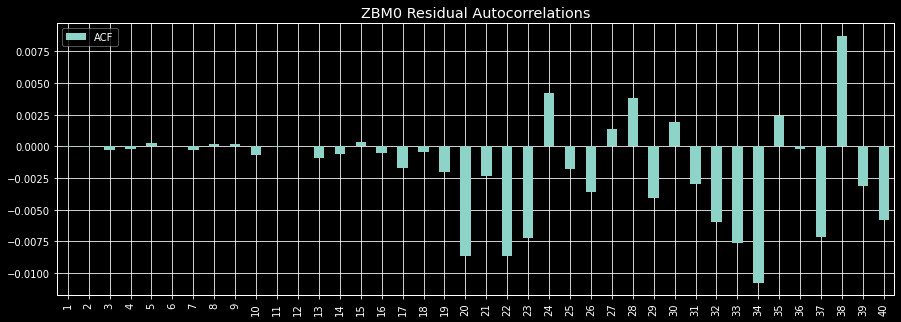

In [ ]:
import statsmodels.api as sm

"""
Since the number lags was directly set, will check whether the residuals appear to be white noise.
"""
acf = DataFrame(sm.tsa.stattools.acf(reg7.resid, fft=True), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='ZBM0 Residual Autocorrelations')

### 1.4.2 DF-GLS test

***Elliott, G., T. J. Rothenberg, and J. H. Stock. 1996. Efficient tests for an autoregressive unit root. Econometrica 64: 813–836***

It performs the modified Dickey–Fuller t test; the test is an augmented
Dickey–Fuller test except that the series is transformed via GLS regression before performing the test. Elliot et al have shown that this test has significantly greater power than the previous versions of the augmented Dickey–Fuller test.

In [ ]:
from arch.unitroot import DFGLS

print('DFGLS-ES series:')
dfgls_es = DFGLS(np.log(original.es))
print(dfgls_es.summary().as_text())
print('>>>>>>>>>>>>>>>>')

print('DFGLS-USDJPY series:')
dfgls_usdjpy = DFGLS(np.log(original.usdjpy))
print(dfgls_usdjpy.summary().as_text())
print('>>>>>>>>>>>>>>>>')

print('DFGLS-GC series:')
dfgls_gc = DFGLS(np.log(original.gc))
print(dfgls_gc.summary().as_text())
print('>>>>>>>>>>>>>>>>')

print('DFGLS-ZBM0 series:')
dfgls_zbm0 = DFGLS(np.log(original.zbm0))
print(dfgls_zbm0.summary().as_text())
print('>>>>>>>>>>>>>>>>')

print('DFGLS-GBPUSD series:')
dfgls_gbpusd = DFGLS(np.log(original.gbpusd))
print(dfgls_gbpusd.summary().as_text())
print('>>>>>>>>>>>>>>>>')

print('DFGLS-EURCHF series:')
dfgls_eurchf = DFGLS(np.log(original.eurchf))
print(dfgls_eurchf.summary().as_text())
print('>>>>>>>>>>>>>>>>')

print('DFGLS-EURUSD series:')
dfgls_eurusd = DFGLS(np.log(original.eurusd))
print(dfgls_eurusd.summary().as_text())


DFGLS-ES series:


<IPython.core.display.Javascript object>

      Dickey-Fuller GLS Results      
Test Statistic                  0.080
P-value                         0.720
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
>>>>>>>>>>>>>>>>
DFGLS-USDJPY series:


<IPython.core.display.Javascript object>

      Dickey-Fuller GLS Results      
Test Statistic                 -4.242
P-value                         0.000
Lags                               48
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
>>>>>>>>>>>>>>>>
DFGLS-GC series:


<IPython.core.display.Javascript object>

      Dickey-Fuller GLS Results      
Test Statistic                 -0.246
P-value                         0.603
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
>>>>>>>>>>>>>>>>
DFGLS-ZBM0 series:


<IPython.core.display.Javascript object>

      Dickey-Fuller GLS Results      
Test Statistic                 -1.878
P-value                         0.060
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
>>>>>>>>>>>>>>>>
DFGLS-GBPUSD series:


<IPython.core.display.Javascript object>

      Dickey-Fuller GLS Results      
Test Statistic                 -1.871
P-value                         0.061
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
>>>>>>>>>>>>>>>>
DFGLS-EURCHF series:


<IPython.core.display.Javascript object>

      Dickey-Fuller GLS Results      
Test Statistic                 -2.061
P-value                         0.039
Lags                               51
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
>>>>>>>>>>>>>>>>
DFGLS-EURUSD series:


<IPython.core.display.Javascript object>

      Dickey-Fuller GLS Results      
Test Statistic                 -0.807
P-value                         0.377
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


cases where p values < 0.05, reject H0 (null hypothesis).

***DF-GLS test shows EURCHF & USDJPY are stationary at original level compared to ADF test [EURUSD, USDJPY, EURCHF]; so, we have 3 nonstationary series and 4 stationary series.***

As 4 series are of the same order of integration that is I(1), cointegration is probable (OR expected). Therefore, VECM model can be estimated. 


### 1.4.3 Zivot-Andrews Test:
**Zivot, E., and Andrews, D.W.K. (1992). Further evidence on the great crash, the oil-price shock, and the unit-root hypothesis. Journal of Business & Economic Studies, 10: 251-270**

The weakness of the ADF unit root tests is their potential confusion of structural breaks in the series as evidence of non-stationarity. 
They may fail to reject the unit root hypothesis if the series have a structural break. Considering the possibilities of structural breaks, we will perform Zivit Andrews test which explicitly account for structural breaks.

Zivot-Andrews test allows the possibility of a single structural break in the series. 

p-value < 0.05 means we can reject the null hypothesis that there is a unit root.

In [ ]:
from arch.unitroot import ZivotAndrews

print('ZA test: ES series:')
za_es = ZivotAndrews(np.log(original.es).values)
print(za_es.summary().as_text())
print('>>>>>>>>>>>>>>>>>>>')

print('ZA test: USDJPY series:')
za_usdjpy = ZivotAndrews(np.log(original.usdjpy).values)
print(za_usdjpy.summary().as_text())
print('>>>>>>>>>>>>>>>>>>>')

print('ZA test: EURUSD series:')
za_eurusd = ZivotAndrews(np.log(original.eurusd).values)
print(za_eurusd.summary().as_text())
print('>>>>>>>>>>>>>>>>>>>')

print('ZA test: EURCHF series:')
za_eurchf = ZivotAndrews(np.log(original.eurchf).values)
print(za_eurchf.summary().as_text())
print('>>>>>>>>>>>>>>>>>>>')

print('ZA test: GBPUSD series:')
za_gbpusd = ZivotAndrews(np.log(original.gbpusd).values)
print(za_gbpusd.summary().as_text())
print('>>>>>>>>>>>>>>>>>>>')

print('ZA test: GC series:')
za_gc = ZivotAndrews(np.log(original.gc).values)
print(za_gc.summary().as_text())
print('>>>>>>>>>>>>>>>>>>>')

print('ZA test: ZBM0 series:')
za_zbm0 = ZivotAndrews(np.log(original.zbm0).values)
print(za_zbm0.summary().as_text())
print('>>>>>>>>>>>>>>>>>>>')

Here also, we find the series 
[USDJPY, 

We have 3 nonstationary series and 4 stationary series. order of integration for non stationary series is 1.

1.   Test each pair of the nonstationary series for cointegration using the Johansen and the Engle-Granger test.
2.   test non-stationary series for cointegration using the Johansen test.


### 1.4.4 Co-integration test:

The method of cointegration is based on an assumption of stationary increments with fixed time lag called I(d). The development of the cointegration technique is based on I(d) integration to infer a
short time as well as long-time equilibrium relations between non-stationary variables via regression analysis. However, regression of a non-stationary time series (on another non-stationary time series) may produce a spurious regression. One way to lookout against it is to find out if the time series are cointegrated. A combination of two or more individual non-stationary series may result in a stationary series.

sometimes a regression with variables at level is preferred rather than at first difference. In this case, it is important to know how to regress non-stationary variables, and if the regression is not a spurious regression. Then, the concept of cointegration is applied.

***Ref: Fanchette, Y., Ramenah, H., Tanougast, C., & Benne, M. (2020). Applying Johansen VECM cointegration approach to propose a forecast model of photovoltaic power output plant in Reunion Island. AIMS Energy, 8(2), 179***

To test for cointegration or to fit cointegrating VECMs, we must also specify how many lags to include in the model.

In [ ]:
from statsmodels.tsa.vector_ar import vecm

original_log = np.log(original)

"""
To test for cointegration we need specify how many lags to include in the model.
"""

# VECM select appropriate lag orders
model = vecm.select_order(original_log.values, maxlags=15)
print(model.summary())

<IPython.core.display.Javascript object>

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -106.2      -106.1   7.828e-47      -106.2
1       -106.4      -106.4   5.887e-47      -106.4
2       -106.6      -106.5   5.175e-47      -106.6
3       -106.7      -106.6   4.656e-47      -106.7
4       -106.7      -106.6   4.532e-47      -106.7
5       -106.7      -106.7   4.406e-47      -106.7
6       -106.8     -106.7*   4.341e-47      -106.7
7       -106.8      -106.7   4.312e-47      -106.7
8       -106.8      -106.6   4.298e-47      -106.7
9       -106.8      -106.6   4.293e-47      -106.7
10      -106.8      -106.6   4.287e-47      -106.7
11      -106.8      -106.6   4.266e-47      -106.7
12      -106.8      -106.6   4.258e-47      -106.7
13      -106.8      -106.6   4.177e-47     -106.7*
14      -106.8      -106.6   4.171e-47      -106.7
15     -106.8*      -106.6  4.156e-47*      -106.7
-------------------------------

In the framework of this example, we follow the BIC and
select a lag length of 6.

#### 1.3.4.1 Johansen co-integration test:

Johansen test can be considered as a multivariate generalization of the ADF test, but Johansen is a strategic test that makes it possible to estimate all cointegrating vectors when more than two variables are considered.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import CointRankResults

"""
definition of det_order:
-1 - no deterministic terms
0  - constant term
1  - linear trend
"""

out = coint_johansen(original_log, det_order = 1, k_ar_diff = 6)

"""
trend specification argument det_order being one as based upon a visual inspection of the data series, since they roughly
seemed to follow a linear trend. 
maximum lag included as determined 
"""
d = {'0.90':0, '0.95':1, '0.99':2}
traces = out.lr1
cvts = out.cvt[:, d['0.99']]
def adjust(val, length= 9): return str(val).ljust(length)
print('Name   |  Test Stat | C(99%)    ->   Signif  \n', '--'*20)
for col, trace, cvt in zip(original.columns, traces, cvts):
    print(adjust(col), '| ', adjust(round(trace,2), 9), "|", adjust(cvt, 8), ' ->  ' , trace > cvt)

Name   |  Test Stat | C(99%)    ->   Signif  
 ----------------------------------------
es        |  604.13    | 150.0778  ->   True
eurusd    |  302.09    | 116.9829  ->   True
gbpusd    |  102.44    | 87.7748   ->   True
gc        |  63.99     | 62.5202   ->   True
usdjpy    |  38.55     | 41.0815   ->   False
zbm0      |  16.07     | 23.1485   ->   False
eurchf    |  5.19      | 6.6349    ->   False


Validating the above output with below rank test:

The number of cointegration relationships is based on both the Trace
and the Eigen value tests as hsown below. 

In [ ]:
# determining the number of cointegrating relationships using a cointegration rank test.
rank1 = select_coint_rank(original_log, det_order = 1, k_ar_diff = 6,
                                   method = 'trace', signif=0.01)

"""
The test is performed with the deterministic trend assumption, 
which means that there is no intercept or trend in the cointegration equation or VAR test.
"""
print(rank1.summary()); print()

rank2 = select_coint_rank(original_log, det_order = 1, k_ar_diff = 6, 
                              method = 'maxeig', signif=0.01)
print(rank2.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   7          604.1          150.1
  1   7          302.1          117.0
  2   7          102.4          87.77
  3   7          63.99          62.52
  4   7          38.55          41.08
-------------------------------------

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          302.0          55.82
  1   2          199.6          49.41
  2   3          38.45          42.86
-------------------------------------


- 1st column in the table shows the rank which is The first column is the number of cointegration relations under the null hypothesis.
- 2nd column reports the number of equations in total. 
- λ trace statistics or eigen values in the 3rd column, 
- 4th shows the corresponding critical values. 
- 1st row of the table tests the null hypothesis of at most one cointegrating vector, against the alternative hypothesis that the number of cointegrating equations is strictly larger than the number assumed under the null hypothesis, i.e., larger than one. 
- test statistic of 604,1 considerably exceeds the critical value (150,10) and so the null of at most one cointegrating vector is rejected. - - test statistic (302,1) also exceeds the critical value (117), so the null of at most two cointegrating vectors is rejected at the 1% level
- This continues, and we also reject the null of at most 3 cointegrating vectors, but we stop at the next row, where we do not reject the null hypothesis of at most 4 cointegrating vectors at the 1% level, and this is the conclusion..

Besides the trace statistic, employed alternative (max-eigenvalue
statistic). In contrast to the trace statistic, the maximum-eigenvalue statistic assumes a given number of r cointegrating relations under the null hypothesis and tests this against the alternative
that there are r + 1 cointegrating equations.

The results differ slightly compared with trace statistic conclusion of 5 cointegrating relations between the interest rates. There are only at most 3 cointegrating vectors in this case.

However, our non-stationary series are integrated of the first order I(1) and found to be cointegrated, VECM can be used so as to enable the examination of short run as well as long-run dynamics of the cointegration series.



#### 1.3.4.2 Engle Granger co-integration test:
Further validation of Johansen test with Engle Granger test

In [ ]:
from arch.unitroot import engle_granger

print('EURUSD -> USDJPY')
eg_test_1 = engle_granger(np.log(original.eurusd), np.log(original.usdjpy), trend="n")
print(eg_test_1); print()

print('EURUSD -> GBPUSD')
eg_test_2 = engle_granger(np.log(original.eurusd), np.log(original.gbpusd), trend="n")
print(eg_test_2); print()

print('EURUSD -> ZBM0')
eg_test_3 = engle_granger(np.log(original.eurusd), np.log(original.zbm0), trend="n")
print(eg_test_3); print()

print('EURUSD -> GC')
eg_test_4 = engle_granger(np.log(original.eurusd), np.log(original.gc), trend="n")
print(eg_test_4); print()

print('EURUSD -> ES')
eg_test_5 = engle_granger(np.log(original.eurusd), np.log(original.es), trend="n")
print(eg_test_5); print()

print('EURUSD -> EURCHF')
eg_test_6 = engle_granger(np.log(original.eurusd), np.log(original.eurchf), trend="n")
print(eg_test_6); print()

print('GBPUSD -> EURCHF')
eg_test_7 = engle_granger(np.log(original.gbpusd), np.log(original.eurchf), trend="n")
print(eg_test_7); print()

print('GBPUSD -> USDJPY')
eg_test_8 = engle_granger(np.log(original.gbpusd), np.log(original.usdjpy), trend="n")
print(eg_test_8); print()

print('GBPUSD -> ES')
eg_test_9 = engle_granger(np.log(original.gbpusd), np.log(original.es), trend="n")
print(eg_test_9); print()

print('GBPUSD -> GC')
eg_test_10 = engle_granger(np.log(original.gbpusd), np.log(original.gc), trend="n")
print(eg_test_10); print()

print('GBPUSD -> ZBM0')
eg_test_11 = engle_granger(np.log(original.gbpusd), np.log(original.zbm0), trend="n")
print(eg_test_11); print()

print('EURCHF -> USDJPY')
eg_test_12 = engle_granger(np.log(original.eurchf), np.log(original.usdjpy), trend="n")
print(eg_test_12); print()

print('EURCHF -> zbm0')
eg_test_13 = engle_granger(np.log(original.eurchf), np.log(original.zbm0), trend="n")
print(eg_test_13); print()

print('EURCHF -> GC')
eg_test_14 = engle_granger(np.log(original.eurchf), np.log(original.gc), trend="n")
print(eg_test_14); print()

print('EURCHF -> ES')
eg_test_15 = engle_granger(np.log(original.eurchf), np.log(original.es), trend="n")
print(eg_test_15); print()

print('ZBM0 -> GC')
eg_test_16 = engle_granger(np.log(original.zbm0), np.log(original.gc), trend="n")
print(eg_test_16); print()

print('ZBM0 -> ES')
eg_test_17 = engle_granger(np.log(original.zbm0), np.log(original.es), trend="n")
print(eg_test_17); print()

print('ZBM0 -> EURUSD')
eg_test_18 = engle_granger(np.log(original.zbm0), np.log(original.eurusd), trend="n")
print(eg_test_18); print()

print('ZBM0 -> GBPUSD')
eg_test_19 = engle_granger(np.log(original.zbm0), np.log(original.gbpusd), trend="n")
print(eg_test_19); print()

print('ZBM0 -> USDJPY')
eg_test_20 = engle_granger(np.log(original.zbm0), np.log(original.usdjpy), trend="n")
print(eg_test_20); print()

print('ES -> GC')
eg_test_21 = engle_granger(np.log(original.es), np.log(original.gc), trend="n")
print(eg_test_21); print()

EURUSD -> USDJPY


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -4.065195350475839
P-value: 0.0008566171133540975
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 33
Trend: c
Estimated Root ρ (γ+1): 0.9980927183050982
Distribution Order: 1

EURUSD -> GBPUSD


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -3.116839354181518
P-value: 0.01971509587792133
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 15
Trend: c
Estimated Root ρ (γ+1): 0.9983111748670619
Distribution Order: 1

EURUSD -> ZBM0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.197398221878736
P-value: 0.16817284342366184
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 6
Trend: c
Estimated Root ρ (γ+1): 0.999572697318746
Distribution Order: 1

EURUSD -> GC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.92860517900527
P-value: 0.032941345706999775
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 19
Trend: c
Estimated Root ρ (γ+1): 0.9995748678822904
Distribution Order: 1

EURUSD -> ES


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -1.7538380743556987
P-value: 0.3400667237925553
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 19
Trend: c
Estimated Root ρ (γ+1): 0.999841380389079
Distribution Order: 1

EURUSD -> EURCHF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -4.095702856202237
P-value: 0.0007633103065068843
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 28
Trend: c
Estimated Root ρ (γ+1): 0.9963474334163882
Distribution Order: 1

GBPUSD -> EURCHF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.9797644971971677
P-value: 0.02875861434111139
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 28
Trend: c
Estimated Root ρ (γ+1): 0.9981881247017153
Distribution Order: 1

GBPUSD -> USDJPY


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.700477803340629
P-value: 0.058321676071616375
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 33
Trend: c
Estimated Root ρ (γ+1): 0.9990472258386123
Distribution Order: 1

GBPUSD -> ES


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -1.7308845788581144
P-value: 0.3506661646095322
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 19
Trend: c
Estimated Root ρ (γ+1): 0.9998348896400404
Distribution Order: 1

GBPUSD -> GC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.867720130744589
P-value: 0.0385779605908465
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 19
Trend: c
Estimated Root ρ (γ+1): 0.999550507859796
Distribution Order: 1

GBPUSD -> ZBM0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.086261147487134
P-value: 0.20468519567645477
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 6
Trend: c
Estimated Root ρ (γ+1): 0.9995951798552235
Distribution Order: 1

EURCHF -> USDJPY


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -5.540194591924154
P-value: 1.3286531275190703e-06
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 36
Trend: c
Estimated Root ρ (γ+1): 0.9953943747421198
Distribution Order: 1

EURCHF -> zbm0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.2529797797774154
P-value: 0.1516611042306451
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 20
Trend: c
Estimated Root ρ (γ+1): 0.9994671030590682
Distribution Order: 1

EURCHF -> GC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.7898266592211978
P-value: 0.04694326045249341
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 20
Trend: c
Estimated Root ρ (γ+1): 0.9995749943757181
Distribution Order: 1

EURCHF -> ES


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -1.6538819341995397
P-value: 0.38713267400264195
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 20
Trend: c
Estimated Root ρ (γ+1): 0.999835201900274
Distribution Order: 1

ZBM0 -> GC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.199879104451239
P-value: 0.16741099640860102
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 19
Trend: c
Estimated Root ρ (γ+1): 0.9997369634718345
Distribution Order: 1

ZBM0 -> ES


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -1.6931267120130284
P-value: 0.3683816944928329
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 3
Trend: c
Estimated Root ρ (γ+1): 0.9998288350209367
Distribution Order: 1

ZBM0 -> EURUSD


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.1970214185445682
P-value: 0.16828875832638668
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 6
Trend: c
Estimated Root ρ (γ+1): 0.9995727703742301
Distribution Order: 1

ZBM0 -> GBPUSD


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.086243730402411
P-value: 0.20469128164425943
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 6
Trend: c
Estimated Root ρ (γ+1): 0.9995951830473112
Distribution Order: 1

ZBM0 -> USDJPY


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.1134323266242907
P-value: 0.19532902015379106
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 33
Trend: c
Estimated Root ρ (γ+1): 0.9995799666787669
Distribution Order: 1

ES -> GC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Engle-Granger Cointegration Test
Statistic: -2.212724320876921
P-value: 0.16350358123948933
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 19
Trend: c
Estimated Root ρ (γ+1): 0.9995523430081751
Distribution Order: 1



The above test results shows similar output as Johansen test with 4 cointegrating variables.

***Models for cointegrated variables should have an error-correction representation; otherwise the model would be misspecified; cointegration goes hand-in-hand with the error correction representation.***


So, we can rewrite the workflow as below:

- Step 1: Performing series stationarity (correlogram & ADF) tests to determine whether there is cointegration relationship or not ->
- -> Step 2: If step1 is true, meaning that series are of the same order of integration and cointegration is likely, therefore VECM model can be estimated. Determining the lag length using Akaike and
Schwarz criteria ->
- -> Step 3: Implementing the Johansen test to determine the amount of cointegration relationships ->
- -> Step 4: Identifying the cointegration relationships or long-term relationships between variables ->
- -> Step 5: Estimating the VECM model by maximum likelihood method, test validations by visual diagnostic or correlogram, and checking that residuals from the model are white noise.